# Rice Disease are classfied using CNN with Tensorflow

In [1]:
# pip install bottleneck --upgrade

In [2]:
# Import Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
# Import train CSV file
data = pd.read_csv('./Data/train.csv')
data.head()

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45


In [4]:
# Check the shape:
data.shape

(10407, 4)

In [5]:
data['label'].unique().tolist()

['bacterial_leaf_blight',
 'bacterial_leaf_streak',
 'bacterial_panicle_blight',
 'blast',
 'brown_spot',
 'dead_heart',
 'downy_mildew',
 'hispa',
 'normal',
 'tungro']

In [6]:
data['variety'].unique().tolist()

['ADT45',
 'IR20',
 'KarnatakaPonni',
 'Onthanel',
 'Ponni',
 'Surya',
 'Zonal',
 'AndraPonni',
 'AtchayaPonni',
 'RR']

In [7]:
data['age'].describe()

count    10407.000000
mean        64.043624
std          8.958830
min         45.000000
25%         60.000000
50%         67.000000
75%         70.000000
max         82.000000
Name: age, dtype: float64

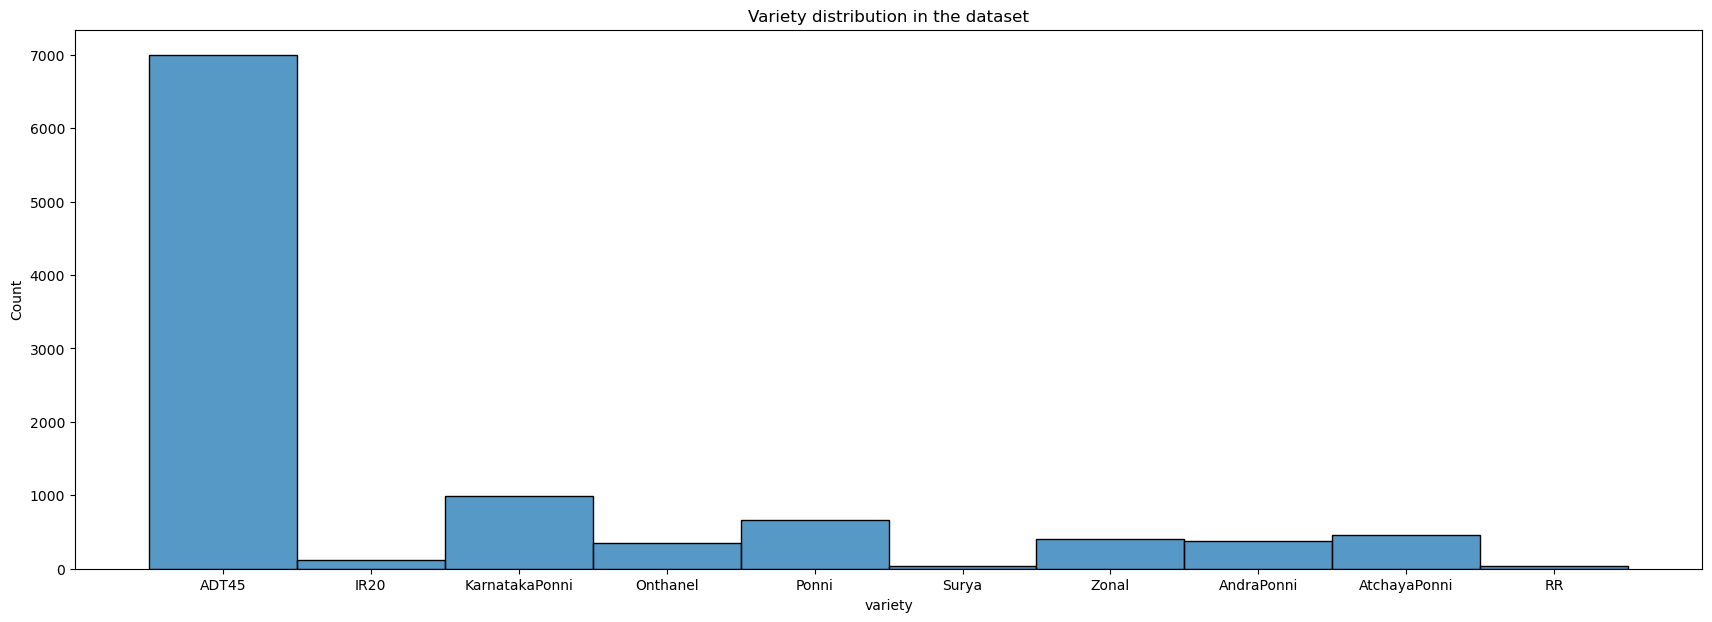

In [8]:
# Plot the data count based on variety name:
fig , axes = plt.subplots(1,1,figsize=(21,7))
sns.histplot(data, x='variety',ax=axes)
plt.title('Variety distribution in the dataset')
plt.show()

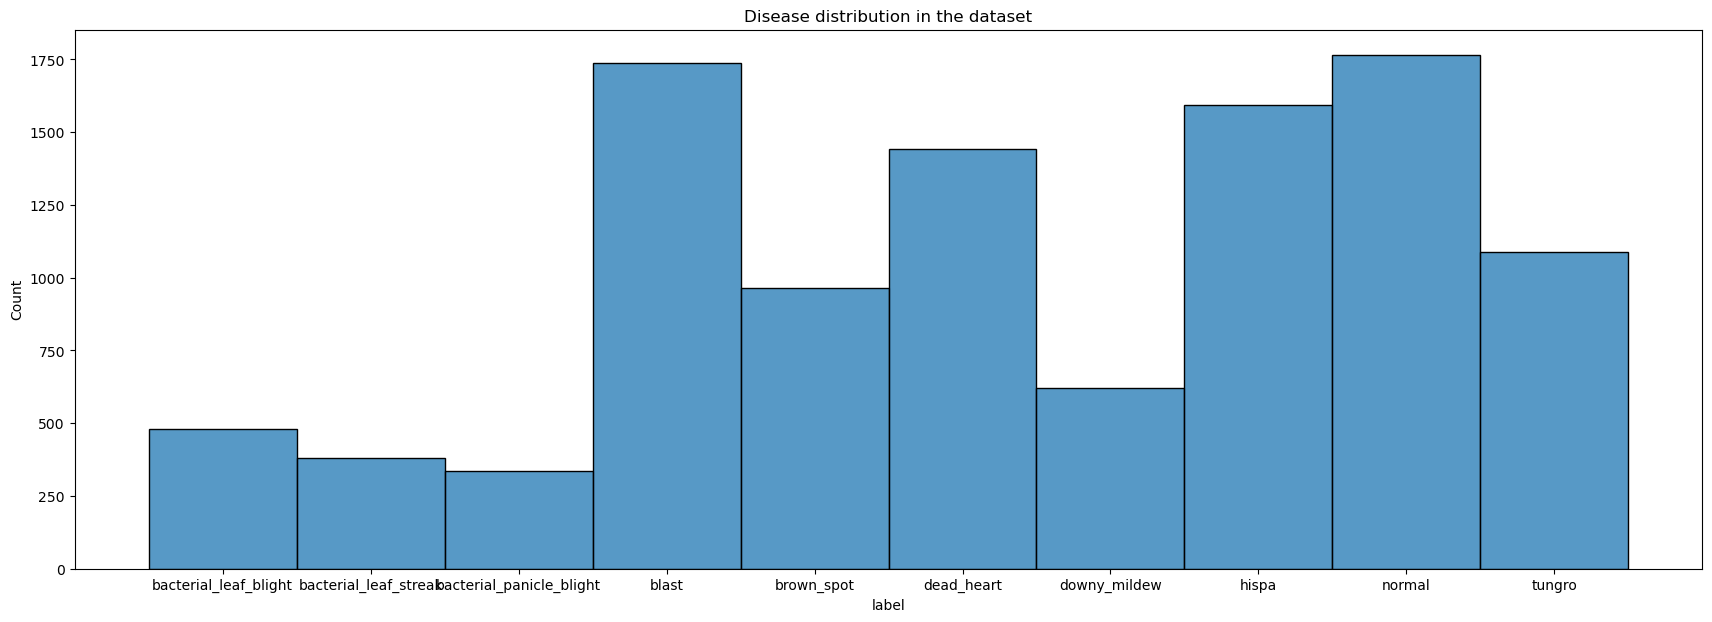

In [9]:
# Plot the data count based on label:
fig , axes = plt.subplots(1,1,figsize=(21,7))
sns.histplot(data, x='label',ax=axes)
plt.title('Disease distribution in the dataset')
plt.show()

In [10]:
normal = data[data['label'] == 'normal']
normal = normal[normal['variety'] == 'ADT45']
five_normals = normal['image_id'][:5].values
five_normals.tolist()

['100007.jpg', '100025.jpg', '100135.jpg', '100165.jpg', '100171.jpg']

In [11]:
dead = data[data['label'] == 'dead_heart']
dead = dead[dead['variety'] == 'ADT45']
five_deads = dead['image_id'][:5].values
five_deads.tolist()

['101165.jpg', '102750.jpg', '108367.jpg', '109900.jpg', '100222.jpg']

In [40]:
path1 ='./Data/test_images/'

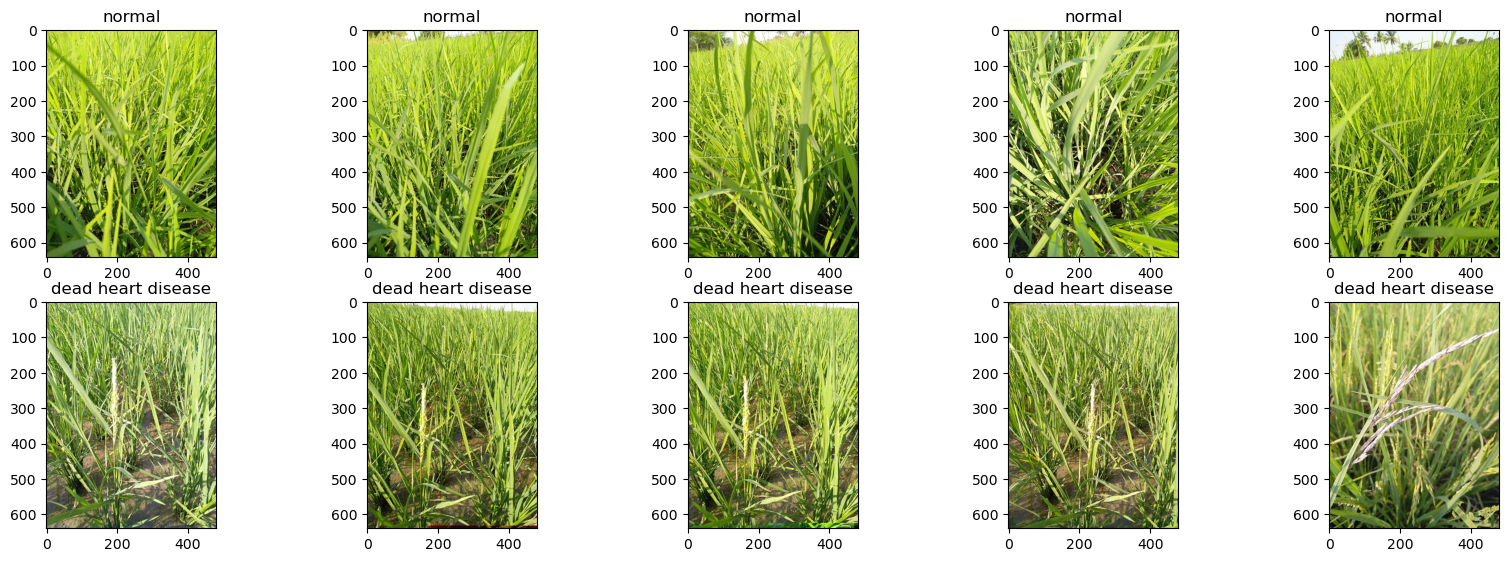

In [12]:
# Make a plot  of images just to have an idea:
plt.figure(figsize=(20,10))
columns =5
path = './Data/train_images/'
for i, image_loc in enumerate(np.concatenate((five_normals,five_deads))):
    plt.subplot(10//columns+1,columns,i+1)

    if i <5:
        image = plt.imread(path + "normal/"+image_loc)
        plt.title('normal')
    else:
        plt.title('dead heart disease')
        image = plt.imread(path +'dead_heart/'+image_loc)
    plt.imshow(image)    

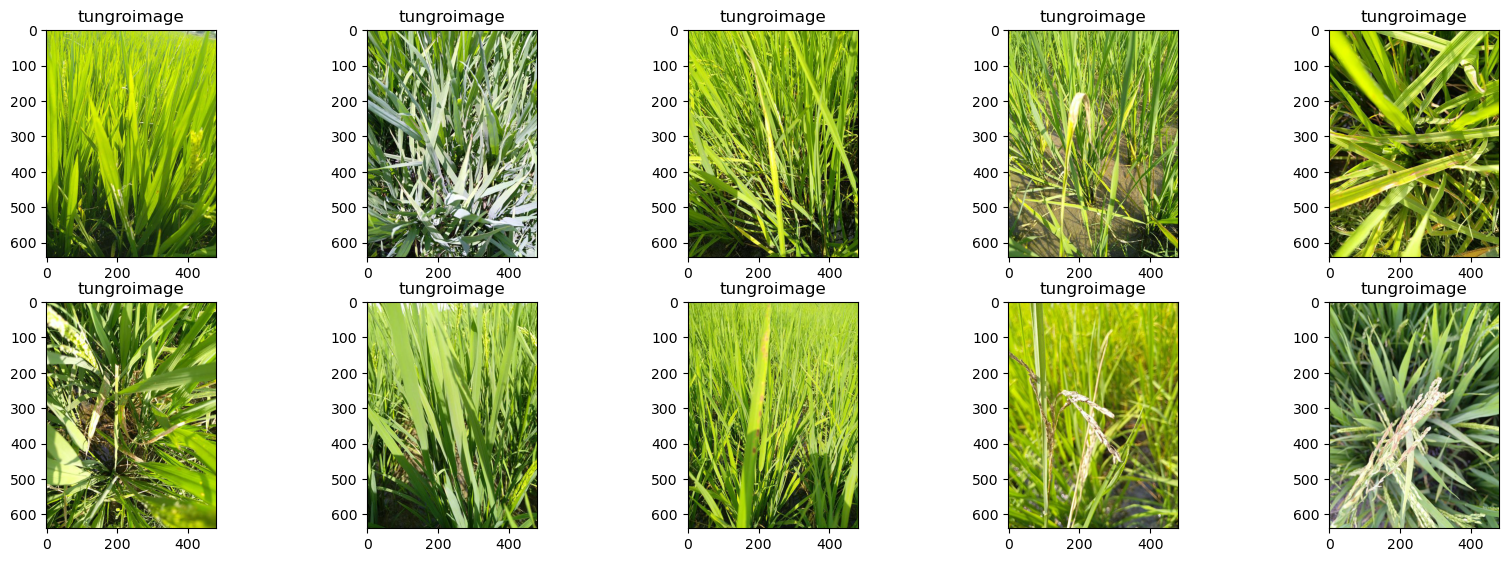

In [13]:
images = ['./Data/train_images/hispa/106590.jpg',\
          './Data/train_images/tungro/109629.jpg',\
          './Data/train_images/bacterial_leaf_blight/109372.jpg',\
          './Data/train_images/downy_mildew/102350.jpg',\
          './Data/train_images/blast/110243.jpg',\
          './Data/train_images/bacterial_leaf_streak/101104.jpg',\
          './Data/train_images/normal/109760.jpg',\
          './Data/train_images/brown_spot/104675.jpg',\
          './Data/train_images/dead_heart/105159.jpg',\
          './Data/train_images/bacterial_panicle_blight/101351.jpg'
]
diseases = ['hispa','tungro','bacterial_leaf_blight','downy_mildew','blast','bacterial',
            'normal','brown_spot','dead_heart','bacterial_panicle_blight']
diseases = [disease +'image' for disease in diseases]

plt.figure(figsize=(20,10))
columns = 5
for i, image_loc in enumerate(images):
    plt.subplot(len(images)//columns + 1, columns,i+1)
    image = plt.imread(image_loc)
    plt.title(diseases[1])
    plt.imshow(image)

In [14]:
data.head()

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45


In [15]:
# Encode the columns label and variety:
from sklearn.preprocessing import LabelEncoder
data['label'] = LabelEncoder().fit_transform(data['label'])
data['variety'] = LabelEncoder().fit_transform(data['variety'])

data.head()

,image_id,label,variety,age
0,100330.jpg,0,0,45
1,100365.jpg,0,0,45
2,100382.jpg,0,0,45
3,100632.jpg,0,0,45
4,101918.jpg,0,0,45


In [16]:
# Define parameters:
batch_size = 16
img_heigh = 224
img_weight = 224

In [17]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset ='training',
    seed = 123,
    image_size = (img_heigh, img_weight),
    batch_size = batch_size)

Found 10407 files belonging to 10 classes.
Using 8326 files for training.


In [31]:
import plotly.express as px
fig = px.scatter(data, x="age", y= "variety",color = "label")
fig.show()

In [33]:
# Create a sunburst plot
fig = px.sunburst(data, 
                  path=['label', 'variety'], 
                  values='age' , color='label')
# Show the plot
fig.show()

In [18]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset ='validation',
    seed = 123,
    image_size = (img_heigh, img_weight),
    batch_size = batch_size)

Found 10407 files belonging to 10 classes.
Using 2081 files for validation.


In [42]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory = path1,
    batch_size = 32,
    image_size = (224, 224),
    label_mode = None,
    shuffle=False
)

Found 3469 files belonging to 1 classes.


In [19]:
class_name = train_ds.class_names
print(class_name)

['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']


In [20]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(16, 224, 224, 3)
(16,)


In [21]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [22]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x),y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image),np.max(first_image))

0.0 1.0


In [23]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [24]:
num_classes = len(class_name)
num_classes

10

In [25]:
model = tf.keras.Sequential([
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Conv2D(32,3,activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64,3,activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64,3,activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dense(10,activation = 'softmax') # Since num_classes = 10 
])

In [26]:
model.compile(
        optimizer = 'adam',
        loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics = ['accuracy']
)

Epoch 1/5



c:\Users\Lenovo\miniconda3\envs\python_ml\Lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(



521/521 [==============================] - 353s 672ms/step - loss: 1.8579 - accuracy: 0.3478 - val_loss: 1.4807 - val_accuracy: 0.5070
Epoch 2/5
521/521 [==============================] - 464s 891ms/step - loss: 1.2102 - accuracy: 0.6011 - val_loss: 1.1241 - val_accuracy: 0.6425
Epoch 3/5
521/521 [==============================] - 360s 691ms/step - loss: 0.7154 - accuracy: 0.7722 - val_loss: 1.0061 - val_accuracy: 0.7198
Epoch 4/5
521/521 [==============================] - 369s 709ms/step - loss: 0.3839 - accuracy: 0.8781 - val_loss: 0.9628 - val_accuracy: 0.7669
Epoch 5/5
131/131 [==============================] - 19s 143ms/step - loss: 1.1025 - accuracy: 0.7376


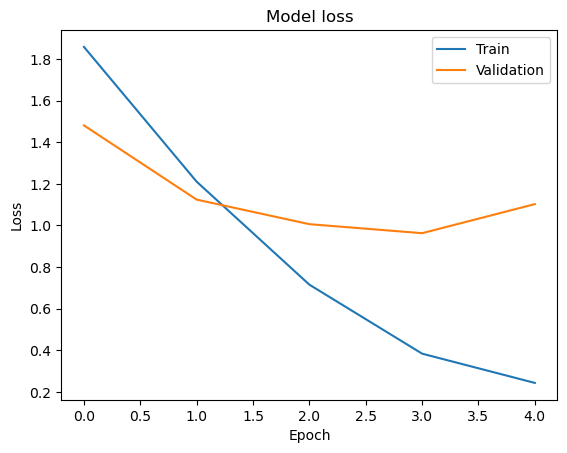

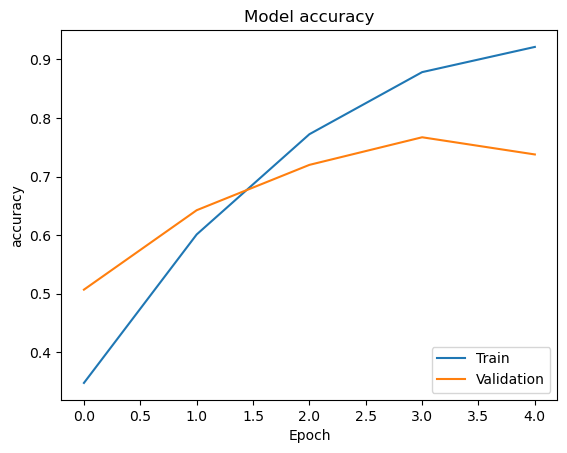

CPU times: total: 1h 10min 14s
Wall time: 32min 57s


In [27]:
%%time
from tensorflow.keras.callbacks import EarlyStopping

# Define the callback function
early_stopping = EarlyStopping(patience=5)

history = model.fit(train_ds,
          validation_data = val_ds,
          epochs=5,
          callbacks = [early_stopping])
# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(val_ds)
loss         

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plotting the training and validation accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [43]:
# Assuming label_names contains the class names in the correct order
labels = ['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast',
               'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']

# Predict the labels of the test set
predictions = model.predict(test_ds)

predicted_labels = [labels[prediction.argmax()] for prediction in predictions]
set(predicted_labels)

109/109 [==============================] - 45s 395ms/step


{'bacterial_leaf_blight',
 'bacterial_leaf_streak',
 'bacterial_panicle_blight',
 'blast',
 'brown_spot',
 'dead_heart',
 'downy_mildew',
 'hispa',
 'normal',
 'tungro'}

In [44]:
# Create a submission file
submission_df = pd.DataFrame({'image_id': test_ds.file_paths, 'label': predicted_labels})

submission_df['image_id'] = submission_df['image_id'].apply(lambda x: x.split('/')[-1])

submission_df.to_csv('./Data/sample_submission.csv', index=False)

In [45]:
submission_df.head()

,image_id,label
0,200001.jpg,brown_spot
1,200002.jpg,normal
2,200003.jpg,normal
3,200004.jpg,blast
4,200005.jpg,blast


## Obeservation:
1. we have 10407, images in train data
2. We have 10 unique disease classes
3. we also have 10 varieties of Rice in this data
4. we have rice plants age ranging from 45 to 85 days
5. ADT45 is the most common variety inside the training data.